# Visualize Terrascope Sentinel-2 products


The Belgian Collaborative ground segment **TERRASCOPE** systematically processes Sentinel-2 L1C products into Surface Reflectance (TOC) and several biophysical parameters (NDVI, FAPAR, FCOVER, LAI) over Belgium. 

This notebook illustrates 1) how to find the paths of different Sentinel-2 products (TOC, NDVI, FAPAR, FCOVER, LAI) for a cloud-free day over Belgium, 2) mosaic them using virtual raster files (vrt) and 3) to visualize these. We use the 'reticulate' R library to access a Python library that supports finding locations of Sentinel-2 products on the MEP. Reusing this Python library ensures that R users can also benefit from everything that is implemented for Python users. 

More information on Terrascope and the Sentinel-2 products can be found at [www.terrascope.be](https://www.terrascope.be/)



# 1. Load libraries


In [10]:
library(raster)
library(gdalUtils)
library(reticulate)
use_python("/usr/bin/python3")

# 2. Get product paths

In [11]:
# reuse a python methods to retrieve products from the catalogue
source_python("products.py")
# first we import the python datetime package
datetime <- import("datetime")

# next we query the catalog for TOC, FCOVER, FAPAR, NDVI and LAI products on 2017-05-26
startDate = datetime$date(2017L, 5L, 26L)
endDate = datetime$date(2017L, 5L, 27L)

In [12]:
ndvi <- get_products("urn:eop:VITO:TERRASCOPE_S2_NDVI_V2", startDate, endDate)
fapar <- get_products("urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2", startDate, endDate)
fcover <- get_products("urn:eop:VITO:TERRASCOPE_S2_FCOVER_V2", startDate, endDate)
lai <- get_products("urn:eop:VITO:TERRASCOPE_S2_LAI_V2", startDate, endDate)
toc <- get_products("urn:eop:VITO:TERRASCOPE_S2_TOC_V2", startDate, endDate)

In [13]:
files_ndvi <- get_product_paths(ndvi, 'NDVI_10M')
head(files_ndvi)
files_fapar <- get_product_paths(fapar, 'FAPAR_10M')
head(files_fapar)
files_fcover <- get_product_paths(fcover, 'FCOVER_10M')
head(files_fcover)
files_lai <- get_product_paths(lai, 'LAI_10M')
head(files_lai)
files_toc_b2 <- get_product_paths(toc, 'TOC-B02_10M')
head(files_toc_b2)
files_toc_b3 <- get_product_paths(toc, 'TOC-B03_10M')
head(files_toc_b3)
files_toc_b4 <- get_product_paths(toc, 'TOC-B04_10M')
head(files_toc_b4)
files_toc_b8 <- get_product_paths(toc, 'TOC-B08_10M')
head(files_toc_b8)

[1] "/data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2017/05/26/S2A_20170526T105031_31UDR_NDVI_V200/S2A_20170526T105031_31UDR_NDVI_10M_V200.tif"
[2] "/data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2017/05/26/S2A_20170526T105031_31UDS_NDVI_V200/S2A_20170526T105031_31UDS_NDVI_10M_V200.tif"
[3] "/data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2017/05/26/S2A_20170526T105031_31UER_NDVI_V200/S2A_20170526T105031_31UER_NDVI_10M_V200.tif"
[4] "/data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2017/05/26/S2A_20170526T105031_31UES_NDVI_V200/S2A_20170526T105031_31UES_NDVI_10M_V200.tif"
[5] "/data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2017/05/26/S2A_20170526T105031_31UET_NDVI_V200/S2A_20170526T105031_31UET_NDVI_10M_V200.tif"
[6] "/data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2017/05/26/S2A_20170526T105031_31UFQ_NDVI_V200/S2A_20170526T105031_31UFQ_NDVI_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/FAPAR_V2/2017/05/26/S2A_20170526T105031_31UDR_FAPAR_V200/10M/S2A_20170526T105031_31UDR_FAPAR_10M_V200.tif"
[2] "/data/MTDA/TERRASCOPE_Sentinel2/FAPAR_V2/2017/05/26/S2A_20170526T105031_31UDS_FAPAR_V200/10M/S2A_20170526T105031_31UDS_FAPAR_10M_V200.tif"
[3] "/data/MTDA/TERRASCOPE_Sentinel2/FAPAR_V2/2017/05/26/S2A_20170526T105031_31UER_FAPAR_V200/10M/S2A_20170526T105031_31UER_FAPAR_10M_V200.tif"
[4] "/data/MTDA/TERRASCOPE_Sentinel2/FAPAR_V2/2017/05/26/S2A_20170526T105031_31UES_FAPAR_V200/10M/S2A_20170526T105031_31UES_FAPAR_10M_V200.tif"
[5] "/data/MTDA/TERRASCOPE_Sentinel2/FAPAR_V2/2017/05/26/S2A_20170526T105031_31UET_FAPAR_V200/10M/S2A_20170526T105031_31UET_FAPAR_10M_V200.tif"
[6] "/data/MTDA/TERRASCOPE_Sentinel2/FAPAR_V2/2017/05/26/S2A_20170526T105031_31UFQ_FAPAR_V200/10M/S2A_20170526T105031_31UFQ_FAPAR_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/FCOVER_V2/2017/05/26/S2A_20170526T105031_31UDR_FCOVER_V200/10M/S2A_20170526T105031_31UDR_FCOVER_10M_V200.tif"
[2] "/data/MTDA/TERRASCOPE_Sentinel2/FCOVER_V2/2017/05/26/S2A_20170526T105031_31UDS_FCOVER_V200/10M/S2A_20170526T105031_31UDS_FCOVER_10M_V200.tif"
[3] "/data/MTDA/TERRASCOPE_Sentinel2/FCOVER_V2/2017/05/26/S2A_20170526T105031_31UER_FCOVER_V200/10M/S2A_20170526T105031_31UER_FCOVER_10M_V200.tif"
[4] "/data/MTDA/TERRASCOPE_Sentinel2/FCOVER_V2/2017/05/26/S2A_20170526T105031_31UES_FCOVER_V200/10M/S2A_20170526T105031_31UES_FCOVER_10M_V200.tif"
[5] "/data/MTDA/TERRASCOPE_Sentinel2/FCOVER_V2/2017/05/26/S2A_20170526T105031_31UET_FCOVER_V200/10M/S2A_20170526T105031_31UET_FCOVER_10M_V200.tif"
[6] "/data/MTDA/TERRASCOPE_Sentinel2/FCOVER_V2/2017/05/26/S2A_20170526T105031_31UFQ_FCOVER_V200/10M/S2A_20170526T105031_31UFQ_FCOVER_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/LAI_V2/2017/05/26/S2A_20170526T105031_31UDR_LAI_V200/10M/S2A_20170526T105031_31UDR_LAI_10M_V200.tif"
[2] "/data/MTDA/TERRASCOPE_Sentinel2/LAI_V2/2017/05/26/S2A_20170526T105031_31UDS_LAI_V200/10M/S2A_20170526T105031_31UDS_LAI_10M_V200.tif"
[3] "/data/MTDA/TERRASCOPE_Sentinel2/LAI_V2/2017/05/26/S2A_20170526T105031_31UER_LAI_V200/10M/S2A_20170526T105031_31UER_LAI_10M_V200.tif"
[4] "/data/MTDA/TERRASCOPE_Sentinel2/LAI_V2/2017/05/26/S2A_20170526T105031_31UES_LAI_V200/10M/S2A_20170526T105031_31UES_LAI_10M_V200.tif"
[5] "/data/MTDA/TERRASCOPE_Sentinel2/LAI_V2/2017/05/26/S2A_20170526T105031_31UET_LAI_V200/10M/S2A_20170526T105031_31UET_LAI_10M_V200.tif"
[6] "/data/MTDA/TERRASCOPE_Sentinel2/LAI_V2/2017/05/26/S2A_20170526T105031_31UFQ_LAI_V200/10M/S2A_20170526T105031_31UFQ_LAI_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UDR_TOC_V200/S2A_20170526T105031_31UDR_TOC-B02_10M_V200.tif"
[2] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UDS_TOC_V200/S2A_20170526T105031_31UDS_TOC-B02_10M_V200.tif"
[3] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UER_TOC_V200/S2A_20170526T105031_31UER_TOC-B02_10M_V200.tif"
[4] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UES_TOC_V200/S2A_20170526T105031_31UES_TOC-B02_10M_V200.tif"
[5] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UET_TOC_V200/S2A_20170526T105031_31UET_TOC-B02_10M_V200.tif"
[6] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UFQ_TOC_V200/S2A_20170526T105031_31UFQ_TOC-B02_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UDR_TOC_V200/S2A_20170526T105031_31UDR_TOC-B03_10M_V200.tif"
[2] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UDS_TOC_V200/S2A_20170526T105031_31UDS_TOC-B03_10M_V200.tif"
[3] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UER_TOC_V200/S2A_20170526T105031_31UER_TOC-B03_10M_V200.tif"
[4] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UES_TOC_V200/S2A_20170526T105031_31UES_TOC-B03_10M_V200.tif"
[5] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UET_TOC_V200/S2A_20170526T105031_31UET_TOC-B03_10M_V200.tif"
[6] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UFQ_TOC_V200/S2A_20170526T105031_31UFQ_TOC-B03_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UDR_TOC_V200/S2A_20170526T105031_31UDR_TOC-B04_10M_V200.tif"
[2] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UDS_TOC_V200/S2A_20170526T105031_31UDS_TOC-B04_10M_V200.tif"
[3] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UER_TOC_V200/S2A_20170526T105031_31UER_TOC-B04_10M_V200.tif"
[4] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UES_TOC_V200/S2A_20170526T105031_31UES_TOC-B04_10M_V200.tif"
[5] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UET_TOC_V200/S2A_20170526T105031_31UET_TOC-B04_10M_V200.tif"
[6] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UFQ_TOC_V200/S2A_20170526T105031_31UFQ_TOC-B04_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UDR_TOC_V200/S2A_20170526T105031_31UDR_TOC-B08_10M_V200.tif"
[2] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UDS_TOC_V200/S2A_20170526T105031_31UDS_TOC-B08_10M_V200.tif"
[3] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UER_TOC_V200/S2A_20170526T105031_31UER_TOC-B08_10M_V200.tif"
[4] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UES_TOC_V200/S2A_20170526T105031_31UES_TOC-B08_10M_V200.tif"
[5] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UET_TOC_V200/S2A_20170526T105031_31UET_TOC-B08_10M_V200.tif"
[6] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/26/S2A_20170526T105031_31UFQ_TOC_V200/S2A_20170526T105031_31UFQ_TOC-B08_10M_V200.tif"

# 3. Make spatial vrt per band (combining all tiles)

Next, we use the gdalbuildvrt function from the gdalUtils library to build spatial vrt's, i.e. a virtual raster file which is a spatial mosaic of all Sentinel-2 tiles for that particular day. 

In [14]:
#TOC
gdalbuildvrt(files_toc_b2,"B2.vrt")
gdalbuildvrt(files_toc_b3,"B3.vrt")
gdalbuildvrt(files_toc_b4,"B4.vrt")
gdalbuildvrt(files_toc_b8,"B8.vrt")

#NDVI
gdalbuildvrt(files_ndvi,"NDVI.vrt")

#FAPAR
gdalbuildvrt(files_fapar,"FAPAR.vrt")

#FCOVER
gdalbuildvrt(files_fcover,"FCOVER.vrt")

#LAI
gdalbuildvrt(files_lai,"LAI.vrt")


NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

# 4. Make multiband vrt

The gdalbuildvrt function is again called to stack the individual Sentinel-2 bands (B2, B3, B4 and B8) into a multiband vrt.

In [15]:
gdalbuildvrt(c("B2.vrt","B3.vrt","B4.vrt","B8.vrt"),"RGBNIR.vrt",separate=T)


NULL

# 5. Plot

Next we use the plotting functions from the R raster package to visualize i) RGB composites and ii) the individual biophysical parameters. Note that these products are scaled between 0-10000 (TOC) or 0-255 (Biopars). More information on the used gains and offset can be found at [www.terrascope.be](https://www.terrascope.be/)

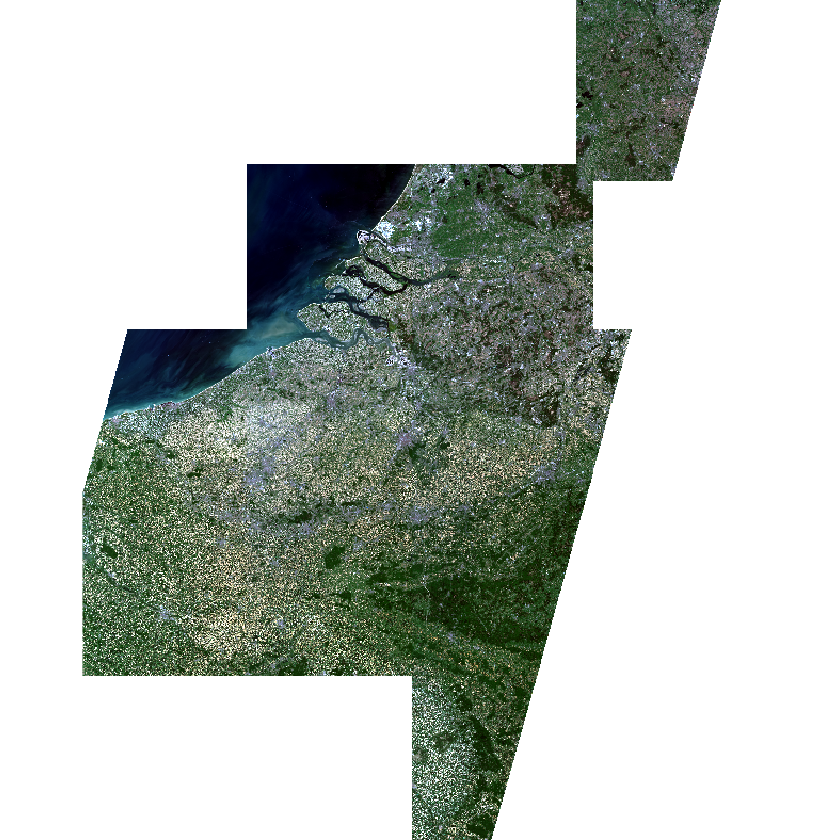

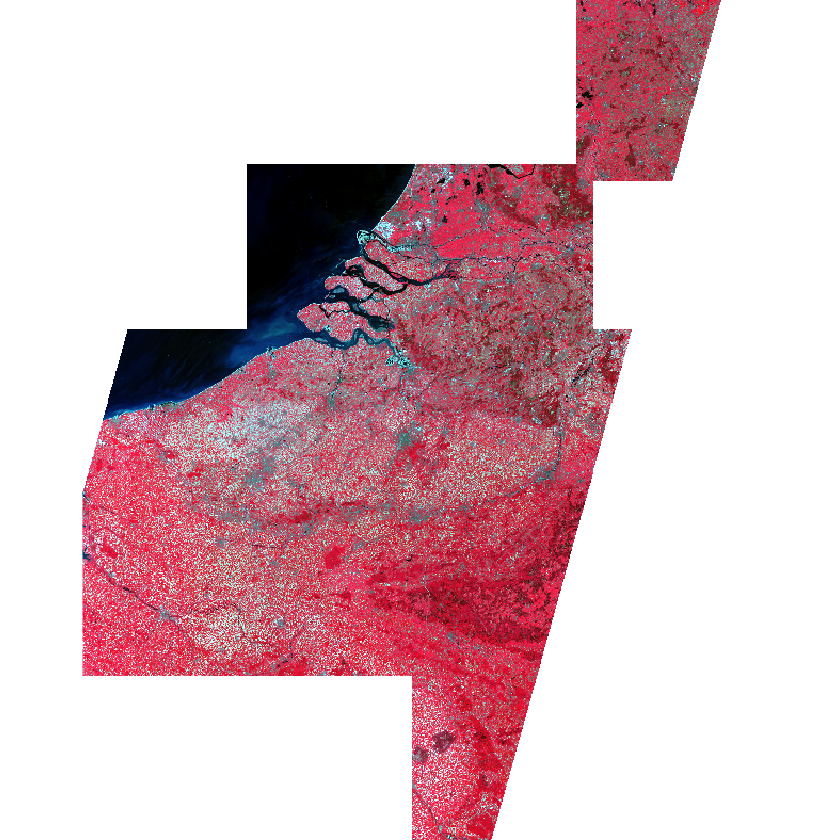

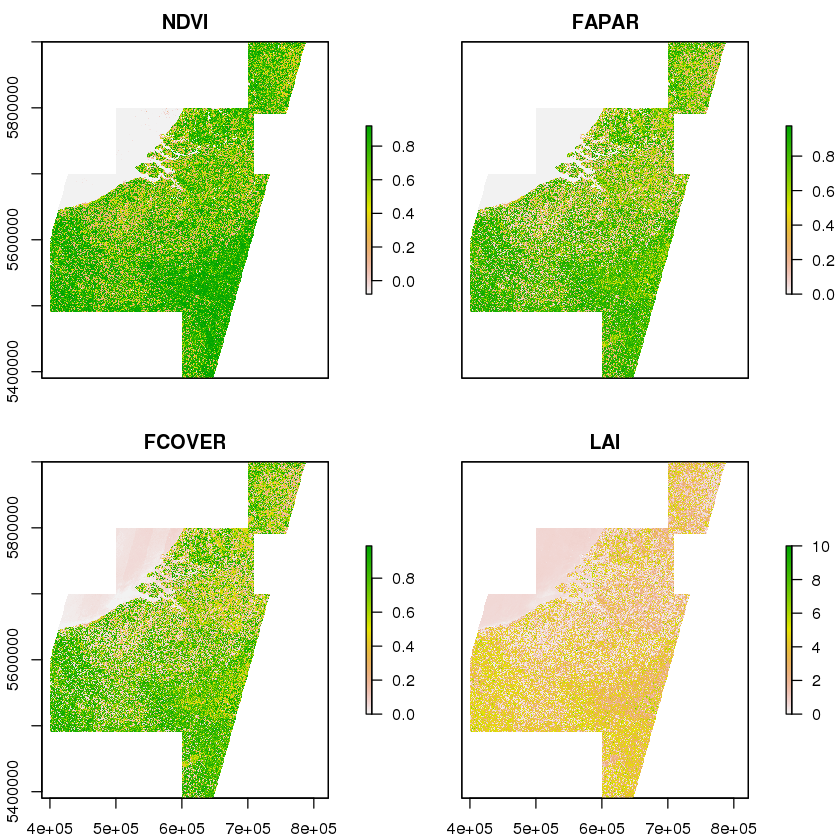

In [16]:
#TOC
im_RGBNIR <- stack("RGBNIR.vrt")
names(im_RGBNIR)<- c("B","G","R","NIR")

#RGB composites
plotRGB(im_RGBNIR,3,2,1,scale=10000,stretch="lin") #True Colour Composite with R=B4, G=B3, B=B2

plotRGB(im_RGBNIR,4,3,2,scale=10000,stretch="lin") #False Colour Composite with R=B8, G=B4, B=B3

#Biopar
im_Biopar <- stack(c(raster("NDVI.vrt"),raster("FAPAR.vrt"),raster("FCOVER.vrt"),raster("LAI.vrt")))
names(im_Biopar) <- c("NDVI","FAPAR","FCOVER","LAI")
plot(im_Biopar)               
